# Lab: Simple Linear Regression
## CMSE 381 - Fall 2022
## Lecture 5 - Sept 12, 2022

In the today's lectures, we are starting focused on simple linear regression, that is, fitting models of the form 
$$
Y =  \beta_0 +  \beta_1 X_1 + \varepsilon
$$
In this lab, we will use two different tools for linear regression. 
- [Scikit learn](https://scikit-learn.org/stable/index.html) is arguably the most used tool for machine learning in python 
- [Statsmodels](https://www.statsmodels.org) provides many of the statisitcial tests we've been learning in class

# 1. The Dataset

In [1]:
# As always, we start with our favorite standard imports. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


In this module, we will be using the `Diabetes` data set again, which you looked into from the last class. In case you've forgotten, there is information about the data set [in the documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes_df['target'] = pd.Series(diabetes.target)

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


------

# 1. Simple Linear Regression

Like last time, we're now going to fit to a simple linear regression to the models
$$
\texttt{target} = \beta_0 + \beta_1 \cdot\texttt{s1}
$$
and 
$$
\texttt{target} = \beta_0 + \beta_1 \cdot\texttt{s5}
$$
where the variables are 
- $\texttt{s1}$: tc, total serum cholesterol

- $\texttt{s5}$: ltg, possibly log of serum triglycerides level. 

Let's start by looking at using `s5` to predict `target`.




In [3]:
from sklearn.linear_model import LinearRegression


# sklearn actually likes being handed numpy arrays more than 
# pandas dataframes, so we'll extract the bits we want and just pass it that. 
X = diabetes_df['s5'].values
X = X.reshape([len(X),1])
y = diabetes_df['target'].values
y = y.reshape([len(y),1])

# This code works by first creating an instance of 
# the linear regression class
reg = LinearRegression()
# Then we pass in the data we want it to use to fit.
reg.fit(X,y)

# and we can get the coefficients we want out of the model from the following code.

print(reg.coef_)
print(reg.intercept_)

# I can do some fancy printing if I really want to
lineString = str(round(reg.coef_[0,0],4)) +  "x_1 + " +  str(round(reg.intercept_[0],4))
print( 'y = ', lineString)

[[916.13872282]]
[152.13348416]
y =  916.1387x_1 + 152.1335


# 2. Assessing Coefficient Estimate Accuracy

To get the statistical test information, we will use the `statsmodels` package. You can take a look at the documentation here: www.statsmodels.org

In [4]:
import statsmodels.formula.api as smf

In [21]:
# Notice that the code is intentially written to look
# more like R than like python, but it still works!
# Double check..... the coefficients here should be
# about the same as those found by scikit-learn
est = smf.ols('target ~ s5', diabetes_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,152.1335,3.027,50.263,0.000,146.185,158.082
s5,916.1387,63.634,14.397,0.000,791.074,1041.204


&#9989; **<font color=red>Q:</font>** What is $SE(\hat \beta_0)$ and $SE(\hat \beta_1)$?

SEB0 = 3.027  

SEB1 = 63.634

&#9989; **<font color=red>Q:</font>** If we instead use `s1` to predict the target, are $SE(\hat \beta_0)$ and $SE(\hat \beta_1)$ higher or lower than what you found for the `s5` prediction? Is this reasonable? Try plotting your predictions against scatter plots of the data to compare. 

In [22]:
# Your code here. 
est2 = smf.ols('target ~ s1', diabetes_df).fit()
est2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,152.1335,3.588,42.405,0.000,145.082,159.185
s1,343.2545,75.426,4.551,0.000,195.015,491.494


<AxesSubplot:xlabel='s1', ylabel='target'>

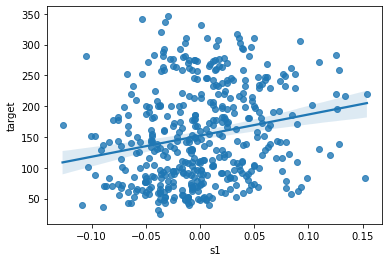

In [26]:
sns.regplot(x = diabetes_df.s1, y = diabetes_df.target)

<AxesSubplot:xlabel='s5', ylabel='target'>

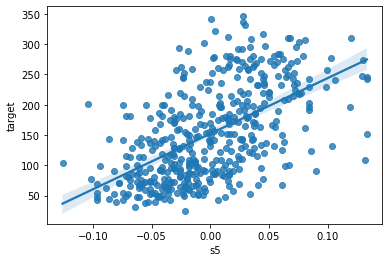

In [27]:
sns.regplot(x = diabetes_df.s5, y = diabetes_df.target)

&#9989; **<font color=red>Q:</font>** What are the confidence intervals for  $\hat \beta_1$ in the two cases (the prediction using `s1` and the prediction using `s5`)? Which is wider and why?  

the interval for s1 is from 195 to 491, and the interval for s5 is from 791 to 1041. The one for s1 is bigger by about 50 because of the spread of the data.

&#9989; **<font color=red>Q:</font>** What is the conclusion of the hypothesis test 
$$H_0: \text{ There is no relationship between $X$ and $Y$}$$
$$H_a: \text{ There is some relationship between $X$ and $Y$}$$
at a confidence level of $\alpha = 0.05$?

Ha, reject the null hypothesis

Oh hey look, there's another table with information stored by the statsmodel class. 

In [24]:
est.summary().tables[0]

Dep. Variable:,target,R-squared:,0.320
Model:,OLS,Adj. R-squared:,0.319
Method:,Least Squares,F-statistic:,207.3
Date:,"Mon, 12 Sep 2022",Prob (F-statistic):,8.82e-39
Time:,15:50:21,Log-Likelihood:,-2461.9
No. Observations:,442,AIC:,4928.
Df Residuals:,440,BIC:,4936.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [25]:
est2.summary().tables[0]

Dep. Variable:,target,R-squared:,0.045
Model:,OLS,Adj. R-squared:,0.043
Method:,Least Squares,F-statistic:,20.71
Date:,"Mon, 12 Sep 2022",Prob (F-statistic):,6.92e-06
Time:,15:50:26,Log-Likelihood:,-2537.0
No. Observations:,442,AIC:,5078.
Df Residuals:,440,BIC:,5086.
Df Model:,1,,
Covariance Type:,nonrobust,,


&#9989; **<font color=red>Q:</font>** What is $R^2$ for the two models?

s5 = 0.32 and s1 = 0.045

![Stop Icon](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Vienna_Convention_road_sign_B2a.svg/180px-Vienna_Convention_road_sign_B2a.svg.png)

Great, you got to here! Hang out for a bit, there's more lecture before we go on to the next portion. 

# 3. Multiple linear regression 
Next we get some code up and running that can do linear regression with multiple input variables, that is when the model is of the form
$$
Y =  \beta_0 +  \beta_1 X_1 +  \beta_2 X_2 + \cdots +  \beta_pX_p + \varepsilon
$$

We first model `target = beta_0 + beta_1 *s1 + beta_2 * s5` using `scikitlearn`.

In [8]:
X = diabetes_df[['s1','s5']].values
y = diabetes_df['target'].values

multireg = LinearRegression() #<----- notice I'm using exactly the same command as above
multireg.fit(X,y)

print(multireg.coef_)
print(multireg.intercept_)

[-175.70879486 1006.71674044]
152.1334841628963


&#9989; **<font color=red>Q:</font>** What are the values for $\beta_0$, $\beta_1$, and $\beta_2$? Write an interpretation for the $\beta_2$ value in this data set. 

B0 = 152, B1 = -175, B2 = 1006

B2 is the average affect on y of one unit increase in x2 if all other x stay the same

In [28]:
diabetes_df.var()

age          0.002268
sex          0.002268
bmi          0.002268
bp           0.002268
s1           0.002268
s2           0.002268
s3           0.002268
s4           0.002268
s5           0.002268
s6           0.002268
target    5943.331348
dtype: float64

We next model `target = beta_0 + beta_1 *s1 + beta_2 * s5` using `statsmodels`. Do you get the same model?

In [10]:
# multiple least squares with statsmodel
multiple_est = smf.ols('target ~ s1 + s5', diabetes_df).fit()
multiple_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     107.6
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           9.63e-39
Time:                        15:13:37   Log-Likelihood:                -2459.0
No. Observations:                 442   AIC:                             4924.
Df Residuals:                     439   BIC:                             4936.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      3.011     50.528      0.000     146.216     158.051
s1          -175.7088     73.872     -2.379      0.018    -320.895     -30.522
s5          1006.7167     73.872     13.628      0.000     861.530    1151.903
==============================================================================
Omnibus:                       10.294   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.496
Skew:                           0.356   Prob(JB):                      0.00526
Kurtosis:                       2.748   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **<font color=red>Q:</font>** What is the predicted model? How much trust can we place in the estimates?

the R squared is now 0.329 which is higher than either s1 or s5 alone, so the regression is more trustworthy than before

&#9989; **<font color=red>Q:</font>** Run the linear regression to predict `target` using all the other variables. What do you notice about the different terms? Are some more related than others? 

In [12]:
multiple_est = smf.ols('target ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5', diabetes_df).fit()
multiple_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     51.29
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           8.68e-63
Time:                        15:34:44   Log-Likelihood:                -2386.5
No. Observations:                 442   AIC:                             4793.
Df Residuals:                     432   BIC:                             4834.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.058      0.000     147.070     157.197
age           -1.9501     59.233     -0.033      0.974    -118.370     114.470
sex         -235.2776     61.065     -3.853      0.000    -355.300    -115.256
bmi          530.1217     65.777      8.059      0.000     400.840     659.404
bp           334.9550     64.609      5.184      0.000     207.969     461.941
s1          -797.2927    416.678     -1.913      0.056   -1616.262      21.676
s2           482.3095    339.011      1.423      0.156    -184.006    1148.625
s3           106.8028    212.471      0.503      0.615    -310.802     524.408
s4           188.7798    161.080      1.172      0.242    -127.818     505.378
s5           767.0135    171.225      4.480      0.000     430.476    1103.551
==============================================================================
Omnibus:                        1.193   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.183
Skew:                           0.026   Prob(JB):                        0.554
Kurtosis:                       2.752   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

some have really high p-values, like s3 and age. Which also mean that some have really low p-values which is shows they

&#9989; **<font color=red>Q:</font>** Earlier you determined the p-value for the `s1` variable when we only used `s1` to predict `target`. What changed about the p-value for `s1` now where it is part of a regression using all the variables. Why?

it increased, probably because there are variables that affect the model in a way that is worse for the ability of s1 to predict the model



-----
### Congratulations, we're done!

Written by Dr. Liz Munch, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.